# Problem Description

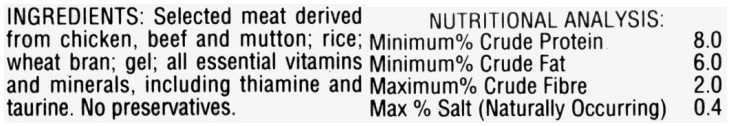

Whiskas cat food, shown above, is manufactured by Uncle Ben’s. Uncle Ben’s want to produce their cat food products as cheaply as possible while ensuring they meet the stated nutritional analysis requirements shown on the cans. Thus they want to vary the quantities of each ingredient used (the main ingredients being chicken, beef, mutton, rice, wheat and gel) while still meeting their nutritional standards.

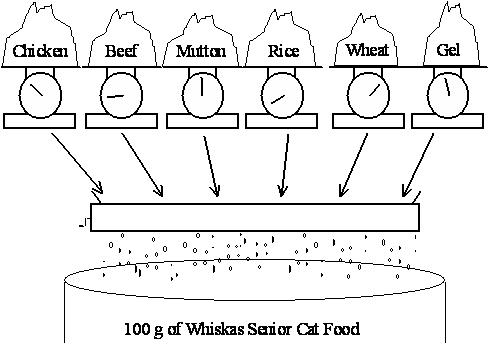

The costs of the chicken, beef, and mutton are \\$0.013, \\$0.008 and \\$0.010 respectively, while
the costs of the rice, wheat and gel are \\$0.002, \\$0.005 and \\$0.001 respectively. (All costs are per
gram.) For this exercise we will ignore the vitamin and mineral ingredients. (Any costs for these
are likely to be very small anyway.) Each ingredient contributes to the total weight of protein, fat,
fibre and salt in the final product which must be 100g (very convenient). The contributions (in
grams) per gram of ingredient are given in the table below.

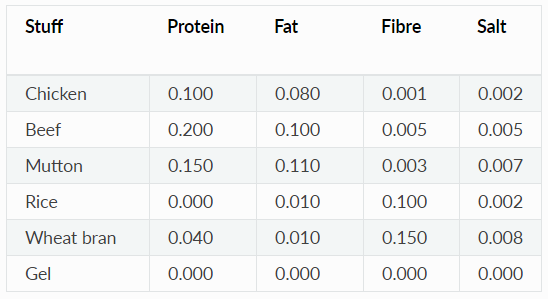

In [1]:
# Import PuLP modeler functions
from pulp import *

In [2]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("The_Whiskas_Problem",LpMinimize)

In [3]:
# The 2 variables Beef and Chicken are created with a lower limit of zero
x1=LpVariable("ChickenPercent",0,None,LpInteger)
x2=LpVariable("BeefPercent",0)

In [4]:
x2

BeefPercent

In [5]:
# The objective function is added to 'prob' first
prob += 0.013*x1 + 0.008*x2, "Total Cost of Ingredients per can"

In [6]:
prob

The_Whiskas_Problem:
MINIMIZE
0.008*BeefPercent + 0.013*ChickenPercent + 0.0
VARIABLES
BeefPercent Continuous
0 <= ChickenPercent Integer

In [7]:
# The five constraints are entered
prob += x1 + x2 == 100, "PercentagesSum"
prob += 0.100*x1 + 0.200*x2 >= 8.0, "ProteinRequirement"
prob += 0.080*x1 + 0.100*x2 >= 6.0, "FatRequirement"
prob += 0.001*x1 + 0.005*x2 <= 2.0, "FibreRequirement"
prob += 0.002*x1 + 0.005*x2 <= 0.4, "SaltRequirement"

In [8]:
prob

The_Whiskas_Problem:
MINIMIZE
0.008*BeefPercent + 0.013*ChickenPercent + 0.0
SUBJECT TO
PercentagesSum: BeefPercent + ChickenPercent = 100

ProteinRequirement: 0.2 BeefPercent + 0.1 ChickenPercent >= 8

FatRequirement: 0.1 BeefPercent + 0.08 ChickenPercent >= 6

FibreRequirement: 0.005 BeefPercent + 0.001 ChickenPercent <= 2

SaltRequirement: 0.005 BeefPercent + 0.002 ChickenPercent <= 0.4

VARIABLES
BeefPercent Continuous
0 <= ChickenPercent Integer

In [9]:
# The problem data is written to an .lp file
prob.writeLP("WhiskasModel.lp")

[BeefPercent, ChickenPercent]

In [10]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [11]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [12]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

BeefPercent = 66.0
ChickenPercent = 34.0


In [13]:
# The optimised objective function value is printed to the screen
print("Total Cost of Ingredients per can = ", value(prob.objective))

Total Cost of Ingredients per can =  0.97


## Another Coding for this problem

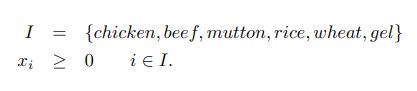

In [14]:
import pulp

In [15]:
#initialise the model
whiskas_model = pulp.LpProblem('The Whiskas Problem', pulp.LpMinimize)
# make a list of ingredients
ingredients = ['chicken', 'beef', 'mutton', 'rice', 'wheat', 'gel']
# create a dictionary of pulp variables with keys from ingredients
# the default lower bound is -inf
x = pulp.LpVariable.dict('x_%s', ingredients, lowBound =0)
x

C:\Users\salim\Anaconda3\lib\site-packages\pulp\pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


{'chicken': x_chicken,
 'beef': x_beef,
 'mutton': x_mutton,
 'rice': x_rice,
 'wheat': x_wheat,
 'gel': x_gel}

In [16]:
# cost data
cost = dict(zip(ingredients, [0.013, 0.008, 0.010, 0.002, 0.005, 0.001]))
cost

{'chicken': 0.013,
 'beef': 0.008,
 'mutton': 0.01,
 'rice': 0.002,
 'wheat': 0.005,
 'gel': 0.001}

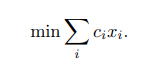
*ci* is the cost per gram of ingredient i.

In [17]:
# create the objective
whiskas_model += sum( [cost[i] * x[i] for i in ingredients])
whiskas_model

The_Whiskas_Problem:
MINIMIZE
0.008*x_beef + 0.013*x_chicken + 0.001*x_gel + 0.01*x_mutton + 0.002*x_rice + 0.005*x_wheat + 0.0
VARIABLES
x_beef Continuous
x_chicken Continuous
x_gel Continuous
x_mutton Continuous
x_rice Continuous
x_wheat Continuous

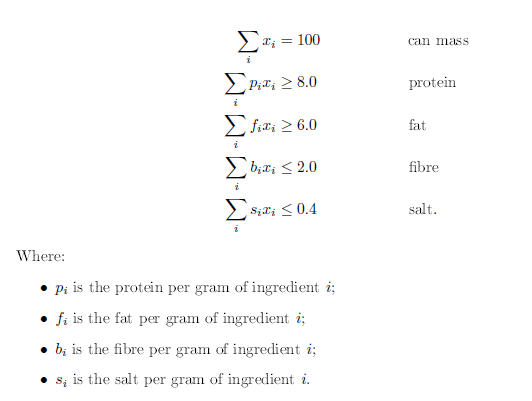

In [18]:
# ingredient parameters
protein = dict(zip(ingredients, [0.100, 0.200, 0.150, 0.000, 0.040, 0.000]))
fat = dict(zip(ingredients, [0.080, 0.100, 0.110, 0.010, 0.010, 0.000]))
fibre = dict(zip(ingredients, [0.001, 0.005, 0.003, 0.100, 0.150, 0.000]))
salt = dict(zip(ingredients, [0.002, 0.005, 0.007, 0.002, 0.008, 0.000]))

In [19]:
#note these are constraints and not an objective as there is a equality/inequality
whiskas_model += sum([protein[i]*x[i] for i in ingredients]) >= 8.0
whiskas_model += sum([fat[i]*x[i] for i in ingredients]) >= 6.0
whiskas_model += sum([fibre[i]*x[i] for i in ingredients]) <= 2.0
whiskas_model += sum([salt[i]*x[i] for i in ingredients]) <= 0.4
whiskas_model

The_Whiskas_Problem:
MINIMIZE
0.008*x_beef + 0.013*x_chicken + 0.001*x_gel + 0.01*x_mutton + 0.002*x_rice + 0.005*x_wheat + 0.0
SUBJECT TO
_C1: 0.2 x_beef + 0.1 x_chicken + 0.15 x_mutton + 0.04 x_wheat >= 8

_C2: 0.1 x_beef + 0.08 x_chicken + 0.11 x_mutton + 0.01 x_rice + 0.01 x_wheat
 >= 6

_C3: 0.005 x_beef + 0.001 x_chicken + 0.003 x_mutton + 0.1 x_rice
 + 0.15 x_wheat <= 2

_C4: 0.005 x_beef + 0.002 x_chicken + 0.007 x_mutton + 0.002 x_rice
 + 0.008 x_wheat <= 0.4

VARIABLES
x_beef Continuous
x_chicken Continuous
x_gel Continuous
x_mutton Continuous
x_rice Continuous
x_wheat Continuous

In [20]:
#problem is then solved with the default solver
a = whiskas_model.solve()
#print the result
for ingredient in ingredients:
    print('The mass of %s is %s grams per can'%(ingredient,x[ingredient].value()))

The mass of chicken is 0.0 grams per can
The mass of beef is 60.0 grams per can
The mass of mutton is 0.0 grams per can
The mass of rice is 0.0 grams per can
The mass of wheat is 0.0 grams per can
The mass of gel is 0.0 grams per can
